Importing Libraries

In [1]:
import numpy as np
import pandas as pd


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Priyanshu
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Priyanshu
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Reading Dataset

In [11]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [13]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5269,spam,"If you don't, your prize will go to another cu...",NaN,NaN,NaN
3207,ham,Oops my phone died and I didn't even know. Yea...,NaN,NaN,NaN
1863,ham,I'll let you know when it kicks in,NaN,NaN,NaN
3230,ham,No plm i will come da. On the way.,NaN,NaN,NaN
3256,ham,"No, but you told me you were going, before you...",NaN,NaN,NaN


Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Removing Unnecessary Columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [16]:
# Renaming Columns
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)

In [17]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Encoding Categorical Target Variable Using Label Encode
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Removing Duplicate Entries from Dataset
df.duplicated().sum()

403

In [22]:
df.drop_duplicates(keep='first', inplace=True)

In [23]:
df.shape

(5169, 2)

In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Exploratory Data Analysis (EDA)

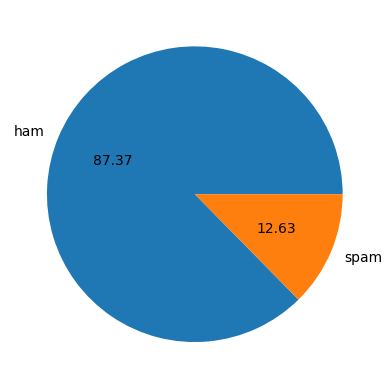

In [30]:
# Visualizing Target Class Distribution with Pie Chart
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [31]:
# Adding new columns: Number of Characters, Words, and Sentences
# Calculate the number of characters in each SMS and add as a new column
df['num_characters'] = df['text'].apply(len)

# Calculate the number of words in each SMS using NLTK tokenizer and add as a new column
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate the number of sentences in each SMS using NLTK tokenizer and add as a new column
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
# for ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#  for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


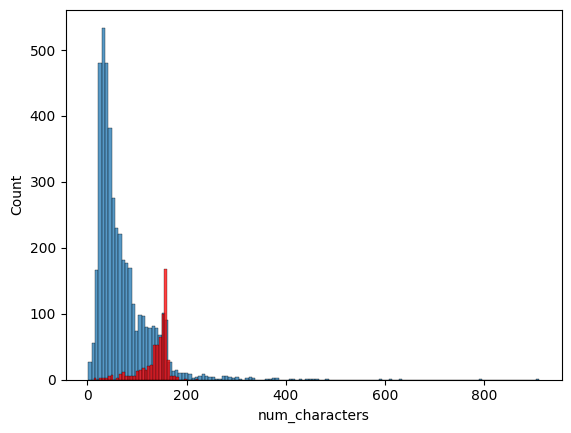

In [37]:
#Visualizing Text Features: Histograms, Pairplots, and Correlation Heatmap
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

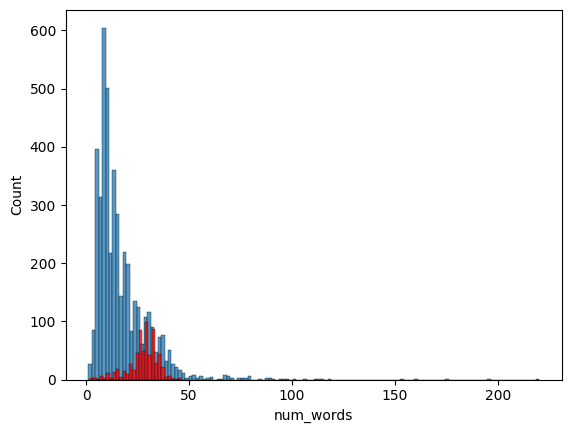

In [38]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

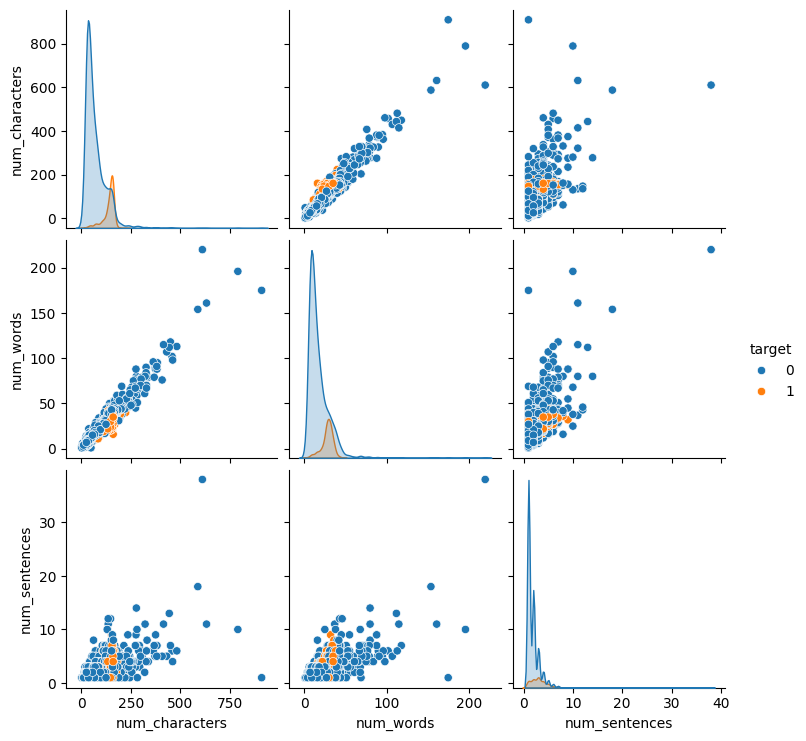

In [39]:
sns.pairplot(df, hue='target')

In [40]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

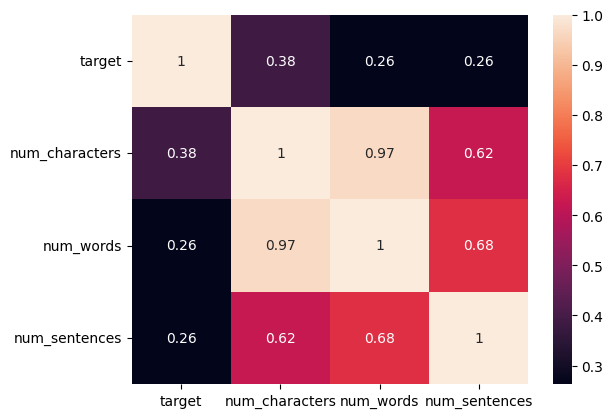

In [41]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)


 Data Preprocessing

In [42]:
#Text Transformation Function: Lowercasing, Tokenization, Cleaning, and Stemming
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [43]:
transform_text("""Say Every Body
            Our Satguru
            The Love Charger
            True Love Charger
            You are The Love Charger
            You are The Love Charger
            I am so Lucky Because
            You are my Love Charger
            You are The Love Charger
            Billions battery when goes down
            You charged up with Love
            So strong Your Power Love""")

'say everi bodi satguru love charger true love charger love charger love charger lucki love charger love charger billion batteri goe charg love strong power love'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


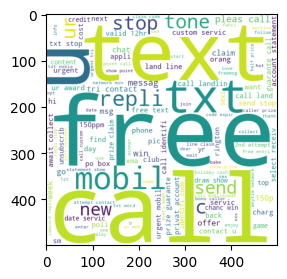

In [74]:
#Generating and Visualizing Word Cloud for Spam and ham Messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

#for spam
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(5,3))
plt.imshow(spam_wc)
plt.show()

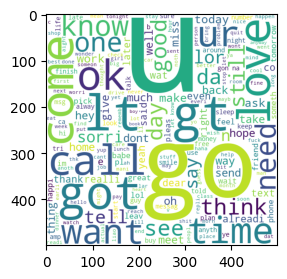

In [75]:
#for ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(5,3))
plt.imshow(ham_wc)
plt.show()

In [49]:
#Visualizing Top 30 Most Common Words in Spam and Ham Messages
#top 30 words of spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

In [66]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


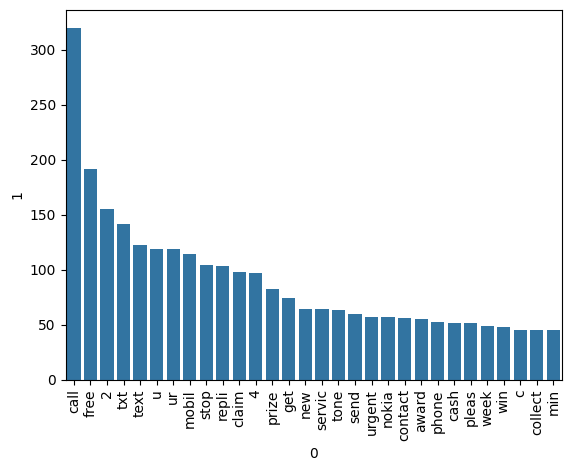

In [58]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
#top 30 words of ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

In [67]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


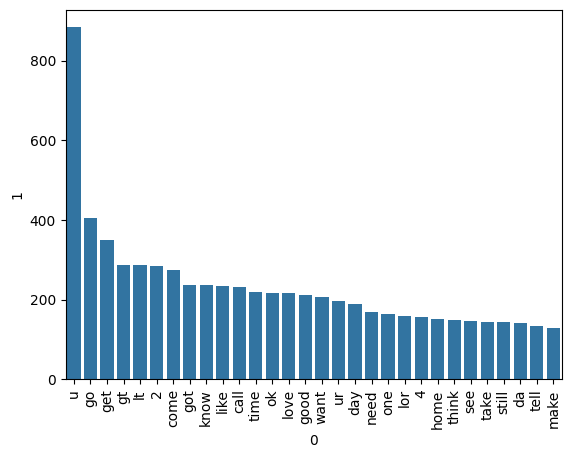

In [57]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Feature Engineering

In [59]:
#Vectorizing Text Data Using CountVectorizer(BoW) and TfidfVectorizer(TF-IDF)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
y = df['target'].values

Model Building

In [68]:
#Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4135, 3001)
Shape of y_train: (4135,)
Shape of X_test: (1034, 3001)
Shape of y_test: (1034,)


In [69]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

0.8907156673114119
[[800  96]
 [ 17 121]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       896
           1       0.56      0.88      0.68       138

    accuracy                           0.89      1034
   macro avg       0.77      0.88      0.81      1034
weighted avg       0.92      0.89      0.90      1034



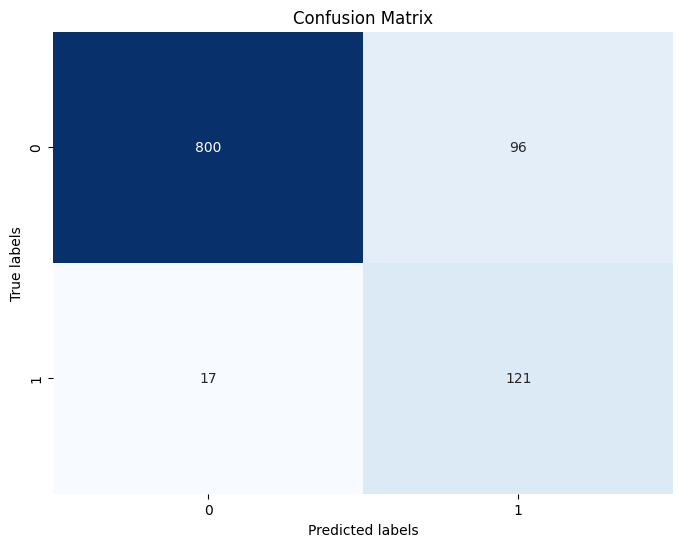

In [70]:
#GaussianNB Model
gnb=GaussianNB()

gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))

cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

0.9835589941972921
[[895   1]
 [ 16 122]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



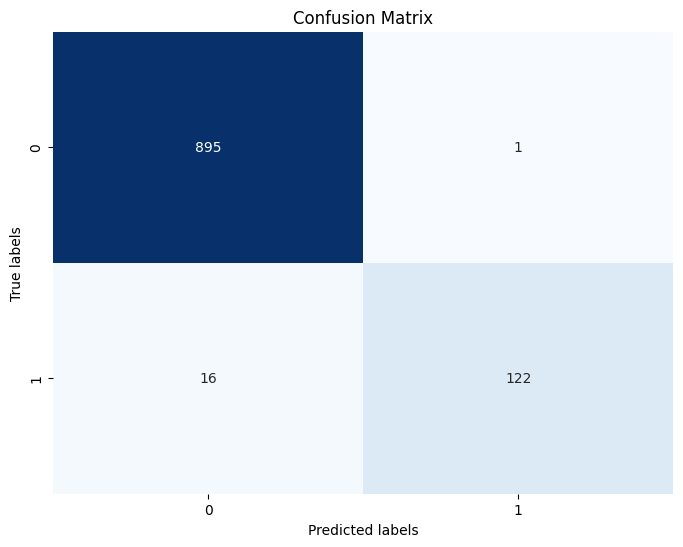

In [71]:
#BernoulliNB Model
bnb=BernoulliNB()


bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

cm = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# the best one is BernoulliNB model

In [73]:
#saving the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))